# Data-Driven Electricity Load Forecasting For a Smart City Community Using Machine Learning Approaches

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.__version__

'1.4.2'

### Solar Dataset

In [4]:
solar_df_10 = pd.read_csv('2010-2011/2010-2011 Solar home electricity data.csv', skiprows=1, parse_dates=['date'], dayfirst=True,
                      na_filter=False, dtype={'Row Quality': str})
solar_df_10.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,GC,2010-07-01,0.303,0.471,0.083,0.121,0.361,...,0.54,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125,
1,1,3.78,2076,CL,2010-07-01,1.250,1.244,1.256,0.744,0.019,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075,
2,1,3.78,2076,GG,2010-07-01,0.000,0.000,0.000,0.000,0.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
3,1,3.78,2076,GC,2010-07-02,0.116,0.346,0.122,0.079,0.120,...,1.10,1.012,0.817,0.526,0.335,0.402,0.142,0.120,0.111,
4,1,3.78,2076,CL,2010-07-02,1.238,1.238,1.256,1.250,0.169,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.088,


In [5]:
solar_df_11 = pd.read_csv('2011-2012/2011-2012 Solar home electricity data.csv', skiprows=1, parse_dates=['date'], dayfirst=True,
                      na_filter=False, dtype={'Row Quality': str})
solar_df_11.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,2011-07-01,1.250,1.250,1.250,0.625,0.219,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.063,
1,1,3.78,2076,GC,2011-07-01,1.077,0.669,0.674,0.615,0.321,...,0.276,0.241,0.168,0.234,0.164,0.639,0.118,0.219,0.162,
2,1,3.78,2076,GG,2011-07-01,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
3,1,3.78,2076,CL,2011-07-02,1.238,1.244,1.194,0.000,0.888,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075,
4,1,3.78,2076,GC,2011-07-02,0.476,0.130,0.044,0.094,0.032,...,0.234,0.306,0.183,0.240,0.170,0.506,0.224,0.088,0.084,


In [6]:
solar_df_12 = pd.read_csv('2012-2013/2012-2013 Solar home electricity data.csv', skiprows=1, parse_dates=['date'], dayfirst=True,
                      na_filter=False, dtype={'Row Quality': str})
solar_df_12.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,2012-07-01,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,
1,1,3.78,2076,GC,2012-07-01,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,
2,1,3.78,2076,GG,2012-07-01,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
3,1,3.78,2076,CL,2012-07-02,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,
4,1,3.78,2076,GC,2012-07-02,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,


In [7]:
solar_df_10.tail()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
269730,300,3.36,2086,CL,2011-06-29,2.136,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,2.490,
269731,300,3.36,2086,GG,2011-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,
269732,300,3.36,2086,GC,2011-06-30,1.306,0.851,0.113,0.151,0.104,...,0.917,0.872,0.832,0.863,0.789,0.28,0.224,0.259,0.774,
269733,300,3.36,2086,CL,2011-06-30,0.904,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,2.528,
269734,300,3.36,2086,GG,2011-06-30,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,


In [8]:
solar_df_11.tail()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
270299,300,3.36,2086,GC,2012-06-29,0.082,0.129,0.084,0.123,0.091,...,0.496,0.387,0.357,0.387,0.408,0.527,0.517,0.393,0.226,
270300,300,3.36,2086,GG,2012-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
270301,300,3.36,2086,CL,2012-06-30,2.110,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.621,
270302,300,3.36,2086,GC,2012-06-30,0.247,0.193,0.109,0.115,0.096,...,1.526,0.799,0.822,0.244,0.200,0.204,0.131,0.358,0.235,
270303,300,3.36,2086,GG,2012-06-30,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,


In [9]:
solar_df_12.tail()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
268552,300,3.36,2086,GC,2013-06-29,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,
268553,300,3.36,2086,GG,2013-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
268554,300,3.36,2086,CL,2013-06-30,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,
268555,300,3.36,2086,GC,2013-06-30,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,
268556,300,3.36,2086,GG,2013-06-30,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,


In [10]:
len(solar_df_10.Postcode.unique())

100

In [11]:
len(solar_df_11.Postcode.unique())

100

In [12]:
len(solar_df_12.Postcode.unique())

100

In [13]:
print(sorted(solar_df_10.Postcode.unique()))

[2008, 2010, 2018, 2021, 2025, 2026, 2029, 2031, 2034, 2037, 2039, 2041, 2044, 2046, 2047, 2048, 2066, 2074, 2076, 2077, 2079, 2081, 2082, 2084, 2085, 2086, 2087, 2088, 2092, 2093, 2096, 2099, 2100, 2111, 2119, 2120, 2126, 2134, 2135, 2137, 2154, 2159, 2162, 2190, 2196, 2198, 2200, 2203, 2204, 2205, 2207, 2208, 2209, 2211, 2216, 2218, 2219, 2220, 2224, 2227, 2228, 2229, 2230, 2231, 2233, 2250, 2251, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2278, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2300, 2303, 2305, 2315, 2320, 2321, 2324, 2325, 2326, 2330]


In [14]:
print(sorted(solar_df_11.Postcode.unique()))

[2008, 2010, 2018, 2021, 2025, 2026, 2029, 2031, 2034, 2037, 2039, 2041, 2044, 2046, 2047, 2048, 2066, 2074, 2076, 2077, 2079, 2081, 2082, 2084, 2085, 2086, 2087, 2088, 2092, 2093, 2096, 2099, 2100, 2111, 2119, 2120, 2126, 2134, 2135, 2137, 2154, 2159, 2162, 2190, 2196, 2198, 2200, 2203, 2204, 2205, 2207, 2208, 2209, 2211, 2216, 2218, 2219, 2220, 2224, 2227, 2228, 2229, 2230, 2231, 2233, 2250, 2251, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2278, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2300, 2303, 2305, 2315, 2320, 2321, 2324, 2325, 2326, 2330]


In [15]:
print(sorted(solar_df_12.Postcode.unique()))

[2008, 2010, 2018, 2021, 2025, 2026, 2029, 2031, 2034, 2037, 2039, 2041, 2044, 2046, 2047, 2048, 2066, 2074, 2076, 2077, 2079, 2081, 2082, 2084, 2085, 2086, 2087, 2088, 2092, 2093, 2096, 2099, 2100, 2111, 2119, 2120, 2126, 2134, 2135, 2137, 2154, 2159, 2162, 2190, 2196, 2198, 2200, 2203, 2204, 2205, 2207, 2208, 2209, 2211, 2216, 2218, 2219, 2220, 2224, 2227, 2228, 2229, 2230, 2231, 2233, 2250, 2251, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2278, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2300, 2303, 2305, 2315, 2320, 2321, 2324, 2325, 2326, 2330]


In [16]:
d0_10 = solar_df_10.date.min()
d1_10 = solar_df_10.date.max()
d0_10, d1_10

(Timestamp('2010-07-01 00:00:00'), Timestamp('2011-06-30 00:00:00'))

In [17]:
d0_11 = solar_df_11.date.min()
d1_11 = solar_df_11.date.max()
d0_11, d1_11

(Timestamp('2011-07-01 00:00:00'), Timestamp('2012-06-30 00:00:00'))

In [18]:
d0_12 = solar_df_12.date.min()
d1_12 = solar_df_12.date.max()
d0_12, d1_12

(Timestamp('2012-07-01 00:00:00'), Timestamp('2013-06-30 00:00:00'))

In [19]:
solar_df_10['Row Quality'].unique()

array([''], dtype=object)

In [20]:
solar_df_11['Row Quality'].unique()

array(['', 'NA'], dtype=object)

In [21]:
solar_df_12['Row Quality'].unique()

array(['', 'NA'], dtype=object)

In [22]:
solar_df_10['Row Quality'].value_counts()

    269735
Name: Row Quality, dtype: int64

In [23]:
solar_df_11['Row Quality'].value_counts()

      270204
NA       100
Name: Row Quality, dtype: int64

In [24]:
solar_df_12['Row Quality'].value_counts()

      268126
NA       431
Name: Row Quality, dtype: int64

In [25]:
len(solar_df_10['Customer'].unique())

300

In [26]:
len(solar_df_11['Customer'].unique())

300

In [27]:
len(solar_df_12['Customer'].unique())

300

In [28]:
solar_df_10['Customer'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [29]:
solar_df_10['Consumption Category'].value_counts()/300/365

GC    1.000000
GG    1.000000
CL    0.463333
Name: Consumption Category, dtype: float64

In [30]:
solar_df_11['Consumption Category'].value_counts()/300/366

GC    1.000000
GG    1.000000
CL    0.461785
Name: Consumption Category, dtype: float64

In [31]:
solar_df_12['Consumption Category'].value_counts()/300/365

GC    0.999260
GG    0.999260
CL    0.454055
Name: Consumption Category, dtype: float64

### Data Preprocessing

In [32]:
from pandas.tseries.offsets import Day

In [33]:
d1_10

Timestamp('2011-06-30 00:00:00')

In [34]:
d1_11

Timestamp('2012-06-30 00:00:00')

In [35]:
d1_12

Timestamp('2013-06-30 00:00:00')

In [36]:
d1_10 + Day(1)

Timestamp('2011-07-01 00:00:00')

In [37]:
d1_11 + Day(1)

Timestamp('2012-07-01 00:00:00')

In [38]:
d1_12 + Day(1)

Timestamp('2013-07-01 00:00:00')

In [39]:
index_10 = pd.date_range(d0_10, d1_10 + Day(1), freq='30T', closed='left')
index_10

/var/folders/g0/g337bxdd06j0sv_7y9k95gj80000gn/T/ipykernel_18035/4079845629.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index_10 = pd.date_range(d0_10, d1_10 + Day(1), freq='30T', closed='left')


DatetimeIndex(['2010-07-01 00:00:00', '2010-07-01 00:30:00',
               '2010-07-01 01:00:00', '2010-07-01 01:30:00',
               '2010-07-01 02:00:00', '2010-07-01 02:30:00',
               '2010-07-01 03:00:00', '2010-07-01 03:30:00',
               '2010-07-01 04:00:00', '2010-07-01 04:30:00',
               ...
               '2011-06-30 19:00:00', '2011-06-30 19:30:00',
               '2011-06-30 20:00:00', '2011-06-30 20:30:00',
               '2011-06-30 21:00:00', '2011-06-30 21:30:00',
               '2011-06-30 22:00:00', '2011-06-30 22:30:00',
               '2011-06-30 23:00:00', '2011-06-30 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq='30T')

In [40]:
index_11 = pd.date_range(d0_11, d1_11 + Day(1), freq='30T', closed='left')
index_11

/var/folders/g0/g337bxdd06j0sv_7y9k95gj80000gn/T/ipykernel_18035/1271887161.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index_11 = pd.date_range(d0_11, d1_11 + Day(1), freq='30T', closed='left')


DatetimeIndex(['2011-07-01 00:00:00', '2011-07-01 00:30:00',
               '2011-07-01 01:00:00', '2011-07-01 01:30:00',
               '2011-07-01 02:00:00', '2011-07-01 02:30:00',
               '2011-07-01 03:00:00', '2011-07-01 03:30:00',
               '2011-07-01 04:00:00', '2011-07-01 04:30:00',
               ...
               '2012-06-30 19:00:00', '2012-06-30 19:30:00',
               '2012-06-30 20:00:00', '2012-06-30 20:30:00',
               '2012-06-30 21:00:00', '2012-06-30 21:30:00',
               '2012-06-30 22:00:00', '2012-06-30 22:30:00',
               '2012-06-30 23:00:00', '2012-06-30 23:30:00'],
              dtype='datetime64[ns]', length=17568, freq='30T')

In [41]:
index_12 = pd.date_range(d0_12, d1_12 + Day(1), freq='30T', closed='left')
index_12

/var/folders/g0/g337bxdd06j0sv_7y9k95gj80000gn/T/ipykernel_18035/1613600740.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index_12 = pd.date_range(d0_12, d1_12 + Day(1), freq='30T', closed='left')


DatetimeIndex(['2012-07-01 00:00:00', '2012-07-01 00:30:00',
               '2012-07-01 01:00:00', '2012-07-01 01:30:00',
               '2012-07-01 02:00:00', '2012-07-01 02:30:00',
               '2012-07-01 03:00:00', '2012-07-01 03:30:00',
               '2012-07-01 04:00:00', '2012-07-01 04:30:00',
               ...
               '2013-06-30 19:00:00', '2013-06-30 19:30:00',
               '2013-06-30 20:00:00', '2013-06-30 20:30:00',
               '2013-06-30 21:00:00', '2013-06-30 21:30:00',
               '2013-06-30 22:00:00', '2013-06-30 22:30:00',
               '2013-06-30 23:00:00', '2013-06-30 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq='30T')

In [42]:
customers_10 = sorted(solar_df_10.Customer.unique())
print(customers_10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [43]:
customers_11 = sorted(solar_df_11.Customer.unique())
print(customers_11)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [44]:
customers_12 = sorted(solar_df_12.Customer.unique())
print(customers_12)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [45]:
channels = solar_df_10['Consumption Category'].unique()
channels

array(['GC', 'CL', 'GG'], dtype=object)

In [46]:
channels = ['GC', 'GG', 'CL']

In [47]:
columns_new_10 = pd.MultiIndex.from_product(
    ([customers_10,channels]), names=['Customer', 'Channel'])
columns_new_10

MultiIndex([(  1, 'GC'),
            (  1, 'GG'),
            (  1, 'CL'),
            (  2, 'GC'),
            (  2, 'GG'),
            (  2, 'CL'),
            (  3, 'GC'),
            (  3, 'GG'),
            (  3, 'CL'),
            (  4, 'GC'),
            ...
            (297, 'CL'),
            (298, 'GC'),
            (298, 'GG'),
            (298, 'CL'),
            (299, 'GC'),
            (299, 'GG'),
            (299, 'CL'),
            (300, 'GC'),
            (300, 'GG'),
            (300, 'CL')],
           names=['Customer', 'Channel'], length=900)

In [48]:
columns_new_11 = pd.MultiIndex.from_product(
    ([customers_11,channels]), names=['Customer', 'Channel'])
columns_new_11

MultiIndex([(  1, 'GC'),
            (  1, 'GG'),
            (  1, 'CL'),
            (  2, 'GC'),
            (  2, 'GG'),
            (  2, 'CL'),
            (  3, 'GC'),
            (  3, 'GG'),
            (  3, 'CL'),
            (  4, 'GC'),
            ...
            (297, 'CL'),
            (298, 'GC'),
            (298, 'GG'),
            (298, 'CL'),
            (299, 'GC'),
            (299, 'GG'),
            (299, 'CL'),
            (300, 'GC'),
            (300, 'GG'),
            (300, 'CL')],
           names=['Customer', 'Channel'], length=900)

In [49]:
columns_new_12 = pd.MultiIndex.from_product(
    ([customers_12,channels]), names=['Customer', 'Channel'])
columns_new_12

MultiIndex([(  1, 'GC'),
            (  1, 'GG'),
            (  1, 'CL'),
            (  2, 'GC'),
            (  2, 'GG'),
            (  2, 'CL'),
            (  3, 'GC'),
            (  3, 'GG'),
            (  3, 'CL'),
            (  4, 'GC'),
            ...
            (297, 'CL'),
            (298, 'GC'),
            (298, 'GG'),
            (298, 'CL'),
            (299, 'GC'),
            (299, 'GG'),
            (299, 'CL'),
            (300, 'GC'),
            (300, 'GG'),
            (300, 'CL')],
           names=['Customer', 'Channel'], length=900)

In [50]:
new_df_10 = pd.DataFrame(index=index_10, columns = columns_new_10)
new_df_10

Customer             1              2              3              4    ...  \
Channel               GC   GG   CL   GC   GG   CL   GC   GG   CL   GC  ...   
2010-07-01 00:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2010-07-01 00:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2010-07-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2010-07-01 01:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2010-07-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2011-06-30 21:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-06-30 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-06-30 22:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-06-30 23:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-06-30 23:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

Customer             297  298            299            300            
Channel               CL   GC   GG   CL   GC   GG   CL   GC   GG   CL  
2010-07-01 00:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2010-07-01 00:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2010-07-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2010-07-01 01:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2010-07-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2011-06-30 21:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-06-30 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-06-30 22:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-06-30 23:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-06-30 23:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[17520 rows x 900 columns]

In [51]:
new_df_11 = pd.DataFrame(index=index_11, columns = columns_new_11)
new_df_11

Customer             1              2              3              4    ...  \
Channel               GC   GG   CL   GC   GG   CL   GC   GG   CL   GC  ...   
2011-07-01 00:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-07-01 00:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-07-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-07-01 01:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2011-07-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2012-06-30 21:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-06-30 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-06-30 22:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-06-30 23:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-06-30 23:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

Customer             297  298            299            300            
Channel               CL   GC   GG   CL   GC   GG   CL   GC   GG   CL  
2011-07-01 00:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-07-01 00:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-07-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-07-01 01:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2011-07-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2012-06-30 21:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-06-30 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-06-30 22:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-06-30 23:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-06-30 23:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[17568 rows x 900 columns]

In [52]:
new_df_12 = pd.DataFrame(index=index_12, columns = columns_new_12)
new_df_12

Customer             1              2              3              4    ...  \
Channel               GC   GG   CL   GC   GG   CL   GC   GG   CL   GC  ...   
2012-07-01 00:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-07-01 00:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-07-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-07-01 01:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2012-07-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2013-06-30 21:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2013-06-30 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2013-06-30 22:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2013-06-30 23:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2013-06-30 23:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

Customer             297  298            299            300            
Channel               CL   GC   GG   CL   GC   GG   CL   GC   GG   CL  
2012-07-01 00:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-07-01 00:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-07-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-07-01 01:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2012-07-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2013-06-30 21:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2013-06-30 22:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2013-06-30 22:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2013-06-30 23:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2013-06-30 23:30:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[17520 rows x 900 columns]

In [53]:
missing_records_10 = []

for c_10 in customers_10:
    dc_10 = solar_df_10[solar_df_10.Customer == c_10]
    for ch in channels:
        dcch_10 = dc_10[dc_10['Consumption Category'] == ch]
        ts_10 = dcch_10.iloc[:,5:-1].values.ravel()
        if len(ts_10) != len(index_10):
            missing_records_10.append((c_10, ch, len(ts_10)))
        else:
            new_df_10[c_10, ch]= ts_10

In [54]:
missing_records_11 = []

for c_11 in customers_11:
    dc_11 = solar_df_11[solar_df_11.Customer == c_11]
    for ch in channels:
        dcch_11 = dc_11[dc_11['Consumption Category'] == ch]
        ts_11 = dcch_11.iloc[:,5:-1].values.ravel()
        if len(ts_11) != len(index_11):
            missing_records_11.append((c_11, ch, len(ts_11)))
        else:
            new_df_11[c_11, ch]= ts_11

In [55]:
missing_records_12 = []

for c_12 in customers_12:
    dc_12 = solar_df_12[solar_df_12.Customer == c_12]
    for ch in channels:
        dcch_12 = dc_12[dc_12['Consumption Category'] == ch]
        ts_12 = dcch_12.iloc[:,5:-1].values.ravel()
        if len(ts_12) != len(index_12):
            missing_records_12.append((c_12, ch, len(ts_12)))
        else:
            new_df_12[c_12, ch]= ts_12

In [56]:
# len(columns_10)
len(new_df_10.columns)

900

In [57]:
# len(columns_11)
len(new_df_11.columns)

900

In [58]:
# len(columns_12)
len(new_df_12.columns)

900

In [59]:
len(missing_records_10)

161

In [60]:
len(missing_records_11)

162

In [61]:
len(missing_records_12)

175

In [62]:
missing_records_10

[(11, 'CL', 0),
 (12, 'CL', 0),
 (13, 'CL', 0),
 (16, 'CL', 0),
 (17, 'CL', 0),
 (20, 'CL', 0),
 (21, 'CL', 0),
 (22, 'CL', 0),
 (24, 'CL', 0),
 (25, 'CL', 0),
 (26, 'CL', 0),
 (28, 'CL', 0),
 (31, 'CL', 0),
 (32, 'CL', 0),
 (33, 'CL', 0),
 (34, 'CL', 0),
 (38, 'CL', 0),
 (40, 'CL', 0),
 (44, 'CL', 0),
 (45, 'CL', 0),
 (46, 'CL', 0),
 (47, 'CL', 0),
 (48, 'CL', 0),
 (50, 'CL', 0),
 (52, 'CL', 0),
 (55, 'CL', 0),
 (57, 'CL', 0),
 (58, 'CL', 0),
 (60, 'CL', 0),
 (62, 'CL', 0),
 (63, 'CL', 0),
 (67, 'CL', 0),
 (72, 'CL', 0),
 (74, 'CL', 0),
 (76, 'CL', 0),
 (78, 'CL', 0),
 (79, 'CL', 0),
 (80, 'CL', 0),
 (82, 'CL', 0),
 (83, 'CL', 0),
 (85, 'CL', 0),
 (86, 'CL', 0),
 (89, 'CL', 0),
 (90, 'CL', 0),
 (91, 'CL', 0),
 (92, 'CL', 0),
 (93, 'CL', 0),
 (97, 'CL', 0),
 (100, 'CL', 0),
 (101, 'CL', 0),
 (102, 'CL', 0),
 (103, 'CL', 0),
 (104, 'CL', 0),
 (106, 'CL', 0),
 (109, 'CL', 0),
 (111, 'CL', 0),
 (113, 'CL', 0),
 (114, 'CL', 0),
 (115, 'CL', 0),
 (116, 'CL', 0),
 (117, 'CL', 0),
 (120, 'CL'

In [63]:
missing_records_11

[(11, 'CL', 0),
 (12, 'CL', 0),
 (13, 'CL', 0),
 (16, 'CL', 0),
 (17, 'CL', 0),
 (20, 'CL', 0),
 (21, 'CL', 0),
 (22, 'CL', 0),
 (24, 'CL', 0),
 (25, 'CL', 0),
 (26, 'CL', 0),
 (27, 'CL', 9408),
 (28, 'CL', 0),
 (31, 'CL', 0),
 (32, 'CL', 0),
 (33, 'CL', 0),
 (34, 'CL', 0),
 (38, 'CL', 0),
 (40, 'CL', 0),
 (44, 'CL', 0),
 (45, 'CL', 0),
 (46, 'CL', 0),
 (47, 'CL', 0),
 (48, 'CL', 0),
 (50, 'CL', 0),
 (52, 'CL', 0),
 (55, 'CL', 0),
 (57, 'CL', 0),
 (58, 'CL', 0),
 (60, 'CL', 0),
 (62, 'CL', 0),
 (63, 'CL', 0),
 (67, 'CL', 0),
 (72, 'CL', 0),
 (74, 'CL', 0),
 (76, 'CL', 0),
 (78, 'CL', 0),
 (79, 'CL', 0),
 (80, 'CL', 0),
 (82, 'CL', 0),
 (83, 'CL', 0),
 (85, 'CL', 0),
 (86, 'CL', 0),
 (89, 'CL', 0),
 (90, 'CL', 0),
 (91, 'CL', 0),
 (92, 'CL', 0),
 (93, 'CL', 0),
 (97, 'CL', 0),
 (100, 'CL', 0),
 (101, 'CL', 0),
 (102, 'CL', 0),
 (103, 'CL', 0),
 (104, 'CL', 0),
 (106, 'CL', 0),
 (109, 'CL', 0),
 (111, 'CL', 0),
 (113, 'CL', 0),
 (114, 'CL', 0),
 (115, 'CL', 0),
 (116, 'CL', 0),
 (117, 'C

In [64]:
missing_records_12

[(2, 'GC', 13632),
 (2, 'GG', 13632),
 (2, 'CL', 13632),
 (11, 'CL', 0),
 (12, 'CL', 0),
 (13, 'CL', 0),
 (16, 'CL', 0),
 (17, 'CL', 0),
 (20, 'CL', 0),
 (21, 'CL', 0),
 (22, 'CL', 0),
 (24, 'CL', 0),
 (25, 'CL', 0),
 (26, 'CL', 0),
 (27, 'CL', 0),
 (28, 'CL', 0),
 (31, 'CL', 0),
 (32, 'CL', 0),
 (33, 'CL', 0),
 (34, 'CL', 0),
 (38, 'CL', 0),
 (40, 'CL', 0),
 (44, 'CL', 0),
 (45, 'CL', 0),
 (46, 'CL', 0),
 (47, 'CL', 0),
 (48, 'CL', 0),
 (50, 'CL', 0),
 (52, 'CL', 0),
 (55, 'CL', 0),
 (57, 'CL', 0),
 (58, 'CL', 0),
 (60, 'CL', 0),
 (62, 'CL', 0),
 (63, 'CL', 0),
 (67, 'CL', 0),
 (68, 'CL', 14400),
 (72, 'CL', 0),
 (74, 'CL', 0),
 (76, 'CL', 0),
 (78, 'CL', 0),
 (79, 'CL', 0),
 (80, 'CL', 0),
 (82, 'CL', 0),
 (83, 'CL', 0),
 (85, 'CL', 0),
 (86, 'CL', 0),
 (89, 'CL', 0),
 (90, 'CL', 0),
 (91, 'CL', 0),
 (92, 'CL', 0),
 (93, 'CL', 0),
 (95, 'CL', 15264),
 (97, 'CL', 0),
 (100, 'CL', 0),
 (101, 'CL', 0),
 (102, 'CL', 0),
 (103, 'CL', 0),
 (104, 'CL', 0),
 (106, 'CL', 0),
 (109, 'CL', 0),


In [65]:
n_empty_CL_10 = 0
missing_records_others_10 = []
for (c_10, ch, len_ts_10) in missing_records_10:
    if ch == 'CL' and len_ts_10 == 0:
        n_empty_CL_10 += 1
    else:
        missing_records_others_10.append((c_10, ch, len_ts_10))
n_empty_CL_10

161

In [66]:
n_empty_CL_11 = 0
missing_records_others_11 = []
for (c_11, ch, len_ts_11) in missing_records_11:
    if ch == 'CL' and len_ts_11 == 0:
        n_empty_CL_11 += 1
    else:
        missing_records_others_11.append((c_11, ch, len_ts_11))
n_empty_CL_11

161

In [67]:
n_empty_CL_12 = 0
missing_records_others_12 = []
for (c_12, ch, len_ts_12) in missing_records_12:
    if ch == 'CL' and len_ts_12 == 0:
        n_empty_CL_12 += 1
    else:
        missing_records_others_12.append((c_12, ch, len_ts_12))
n_empty_CL_12

162

In [68]:
missing_records_others_10

[]

In [69]:
missing_records_others_11

[(27, 'CL', 9408)]

In [70]:
missing_records_others_12

[(2, 'GC', 13632),
 (2, 'GG', 13632),
 (2, 'CL', 13632),
 (68, 'CL', 14400),
 (95, 'CL', 15264),
 (161, 'CL', 14688),
 (187, 'CL', 14736),
 (248, 'CL', 15360),
 (272, 'CL', 14400),
 (284, 'CL', 14400),
 (289, 'CL', 14640),
 (293, 'CL', 15216),
 (294, 'CL', 14736)]

In [71]:
new_df_10.head()

Customer               1                  2                3                \
Channel                 GC   GG     CL     GC   GG   CL     GC   GG     CL   
2010-07-01 00:00:00  0.303  0.0  1.250  0.085  0.0  0.0  0.669  0.0  2.029   
2010-07-01 00:30:00  0.471  0.0  1.244  0.142  0.0  0.0  0.671  0.0  2.013   
2010-07-01 01:00:00  0.083  0.0  1.256  0.082  0.0  0.0  0.675  0.0  1.000   
2010-07-01 01:30:00  0.121  0.0  0.744  0.119  0.0  0.0  0.683  0.0  0.000   
2010-07-01 02:00:00  0.361  0.0  0.019  0.105  0.0  0.0  0.694  0.0  0.000   

Customer               4    ...  297    298              299              300  \
Channel                 GC  ...   CL     GC   GG   CL     GC   GG   CL     GC   
2010-07-01 00:00:00  0.075  ...  0.0  0.096  0.0  NaN  1.464  0.0  NaN  0.279   
2010-07-01 00:30:00  0.086  ...  0.0  0.110  0.0  NaN  1.413  0.0  NaN  0.924   
2010-07-01 01:00:00  0.085  ...  0.0  0.080  0.0  NaN  1.428  0.0  NaN  0.803   
2010-07-01 01:30:00  0.084  ...  0.0  0.105  0.0  NaN  1.445  0.0  NaN  0.066   
2010-07-01 02:00:00  0.084  ...  0.0  0.089  0.0  NaN  1.407  0.0  NaN  0.089   

Customer                         
Channel               GG     CL  
2010-07-01 00:00:00  0.0  2.487  
2010-07-01 00:30:00  0.0  2.392  
2010-07-01 01:00:00  0.0  1.285  
2010-07-01 01:30:00  0.0  0.000  
2010-07-01 02:00:00  0.0  0.000  

[5 rows x 900 columns]

In [72]:
new_df_11.head()

Customer               1                  2                3                \
Channel                 GC   GG     CL     GC   GG   CL     GC   GG     CL   
2011-07-01 00:00:00  1.077  0.0  1.250  0.276  0.0  0.0  0.060  0.0  2.008   
2011-07-01 00:30:00  0.669  0.0  1.250  0.134  0.0  0.0  0.062  0.0  0.218   
2011-07-01 01:00:00  0.674  0.0  1.250  0.169  0.0  0.0  0.060  0.0  0.000   
2011-07-01 01:30:00  0.615  0.0  0.625  0.185  0.0  0.0  0.059  0.0  0.000   
2011-07-01 02:00:00  0.321  0.0  0.219  0.141  0.0  0.0  0.060  0.0  0.000   

Customer               4    ...    297    298              299            \
Channel                 GC  ...     CL     GC   GG   CL     GC   GG   CL   
2011-07-01 00:00:00  0.104  ...  0.000  0.100  0.0  NaN  0.140  0.0  NaN   
2011-07-01 00:30:00  0.107  ...  0.000  0.068  0.0  NaN  0.160  0.0  NaN   
2011-07-01 01:00:00  0.104  ...  0.000  0.068  0.0  NaN  0.116  0.0  NaN   
2011-07-01 01:30:00  0.108  ...  1.311  0.068  0.0  NaN  0.162  0.0  NaN   
2011-07-01 02:00:00  0.110  ...  0.000  0.069  0.0  NaN  0.138  0.0  NaN   

Customer               300              
Channel                 GC   GG     CL  
2011-07-01 00:00:00  1.034  0.0  2.533  
2011-07-01 00:30:00  0.631  0.0  0.265  
2011-07-01 01:00:00  0.119  0.0  0.000  
2011-07-01 01:30:00  0.098  0.0  0.000  
2011-07-01 02:00:00  0.109  0.0  0.000  

[5 rows x 900 columns]

In [73]:
new_df_12.head()

Customer               1                2                3                4    \
Channel                 GC   GG     CL   GC   GG   CL     GC   GG   CL     GC   
2012-07-01 00:00:00  0.855  0.0  1.250  NaN  NaN  NaN  0.965  0.0  0.0  0.084   
2012-07-01 00:30:00  0.786  0.0  1.250  NaN  NaN  NaN  0.927  0.0  0.0  0.084   
2012-07-01 01:00:00  0.604  0.0  1.250  NaN  NaN  NaN  1.359  0.0  0.0  0.082   
2012-07-01 01:30:00  0.544  0.0  1.263  NaN  NaN  NaN  0.060  0.0  0.0  0.084   
2012-07-01 02:00:00  0.597  0.0  0.131  NaN  NaN  NaN  0.059  0.0  0.0  0.086   

Customer             ...   297    298              299              300       \
Channel              ...    CL     GC   GG   CL     GC   GG   CL     GC   GG   
2012-07-01 00:00:00  ...  0.00  0.157  0.0  NaN  0.541  0.0  NaN  0.219  0.0   
2012-07-01 00:30:00  ...  0.00  0.127  0.0  NaN  0.100  0.0  NaN  0.099  0.0   
2012-07-01 01:00:00  ...  0.00  0.122  0.0  NaN  0.090  0.0  NaN  0.134  0.0   
2012-07-01 01:30:00  ...  1.33  0.120  0.0  NaN  0.094  0.0  NaN  0.100  0.0   
2012-07-01 02:00:00  ...  0.00  0.106  0.0  NaN  0.046  0.0  NaN  0.123  0.0   

Customer                    
Channel                 CL  
2012-07-01 00:00:00  2.673  
2012-07-01 00:30:00  1.246  
2012-07-01 01:00:00  0.000  
2012-07-01 01:30:00  0.000  
2012-07-01 02:00:00  0.000  

[5 rows x 900 columns]

In [74]:
new_df_10.tail()

Customer               1                  2                3              \
Channel                 GC   GG     CL     GC   GG   CL     GC   GG   CL   
2011-06-30 21:30:00  0.228  0.0  0.000  0.246  0.0  0.0  0.459  0.0  0.0   
2011-06-30 22:00:00  0.458  0.0  0.000  0.302  0.0  0.0  0.456  0.0  0.0   
2011-06-30 22:30:00  0.685  0.0  0.000  0.348  0.0  0.0  0.722  0.0  0.0   
2011-06-30 23:00:00  0.650  0.0  0.000  0.248  0.0  0.0  0.060  0.0  0.0   
2011-06-30 23:30:00  0.650  0.0  1.094  0.294  0.0  0.0  0.108  0.0  0.0   

Customer               4    ...    297    298              299            \
Channel                 GC  ...     CL     GC   GG   CL     GC   GG   CL   
2011-06-30 21:30:00  0.112  ...  0.000  0.685  0.0  NaN  0.876  0.0  NaN   
2011-06-30 22:00:00  0.100  ...  0.782  0.450  0.0  NaN  0.258  0.0  NaN   
2011-06-30 22:30:00  0.106  ...  2.409  0.281  0.0  NaN  0.126  0.0  NaN   
2011-06-30 23:00:00  0.109  ...  1.998  0.279  0.0  NaN  0.167  0.0  NaN   
2011-06-30 23:30:00  0.108  ...  0.000  0.187  0.0  NaN  0.145  0.0  NaN   

Customer               300              
Channel                 GC   GG     CL  
2011-06-30 21:30:00  0.789  0.0  0.000  
2011-06-30 22:00:00  0.280  0.0  0.000  
2011-06-30 22:30:00  0.224  0.0  0.000  
2011-06-30 23:00:00  0.259  0.0  0.000  
2011-06-30 23:30:00  0.774  0.0  2.528  

[5 rows x 900 columns]

In [75]:
new_df_11.tail()

Customer               1                  2                3                \
Channel                 GC   GG     CL     GC   GG   CL     GC     GG   CL   
2012-06-30 21:30:00  0.622  0.0  0.000  0.368  0.0  0.0  0.066  0.000  0.0   
2012-06-30 22:00:00  0.509  0.0  0.000  0.305  0.0  0.0  0.768  0.000  0.0   
2012-06-30 22:30:00  0.716  0.0  0.000  0.285  0.0  0.0  0.966  0.000  0.0   
2012-06-30 23:00:00  0.999  0.0  0.000  0.286  0.0  0.0  0.957  0.006  0.0   
2012-06-30 23:30:00  0.916  0.0  1.063  0.188  0.0  0.0  0.902  0.000  0.0   

Customer               4    ...    297    298              299            \
Channel                 GC  ...     CL     GC   GG   CL     GC   GG   CL   
2012-06-30 21:30:00  0.159  ...  0.000  0.173  0.0  NaN  1.095  0.0  NaN   
2012-06-30 22:00:00  0.134  ...  0.814  0.154  0.0  NaN  0.946  0.0  NaN   
2012-06-30 22:30:00  0.101  ...  2.369  0.150  0.0  NaN  1.834  0.0  NaN   
2012-06-30 23:00:00  0.086  ...  1.915  0.142  0.0  NaN  1.719  0.0  NaN   
2012-06-30 23:30:00  0.082  ...  0.000  0.145  0.0  NaN  1.412  0.0  NaN   

Customer               300              
Channel                 GC   GG     CL  
2012-06-30 21:30:00  0.200  0.0  0.000  
2012-06-30 22:00:00  0.204  0.0  0.000  
2012-06-30 22:30:00  0.131  0.0  0.000  
2012-06-30 23:00:00  0.358  0.0  0.000  
2012-06-30 23:30:00  0.235  0.0  2.621  

[5 rows x 900 columns]

In [76]:
new_df_12.tail()

Customer               1                2                3                4    \
Channel                 GC   GG     CL   GC   GG   CL     GC   GG   CL     GC   
2013-06-30 21:30:00  0.274  0.0  0.000  NaN  NaN  NaN  0.056  0.0  0.0  0.134   
2013-06-30 22:00:00  0.509  0.0  0.000  NaN  NaN  NaN  0.056  0.0  0.0  0.137   
2013-06-30 22:30:00  0.166  0.0  0.000  NaN  NaN  NaN  0.065  0.0  0.0  0.140   
2013-06-30 23:00:00  0.861  0.0  0.000  NaN  NaN  NaN  0.063  0.0  0.0  0.112   
2013-06-30 23:30:00  0.631  0.0  1.056  NaN  NaN  NaN  0.052  0.0  0.0  0.107   

Customer             ...    297    298              299              300       \
Channel              ...     CL     GC   GG   CL     GC   GG   CL     GC   GG   
2013-06-30 21:30:00  ...  0.000  0.267  0.0  NaN  0.618  0.0  NaN  0.581  0.0   
2013-06-30 22:00:00  ...  0.775  0.273  0.0  NaN  0.568  0.0  NaN  0.458  0.0   
2013-06-30 22:30:00  ...  2.413  0.247  0.0  NaN  0.832  0.0  NaN  0.472  0.0   
2013-06-30 23:00:00  ...  1.095  0.149  0.0  NaN  0.760  0.0  NaN  0.732  0.0   
2013-06-30 23:30:00  ...  0.000  0.138  0.0  NaN  0.150  0.0  NaN  0.297  0.0   

Customer                    
Channel                 CL  
2013-06-30 21:30:00  0.000  
2013-06-30 22:00:00  0.000  
2013-06-30 22:30:00  0.000  
2013-06-30 23:00:00  0.000  
2013-06-30 23:30:00  2.468  

[5 rows x 900 columns]

In [77]:
new_df_10 *= 2

In [78]:
new_df_11 *= 2

In [79]:
new_df_12 *= 2

In [80]:
new_df_10[1].mean()

Channel
GC    0.699793
GG    0.555445
CL    0.275590
dtype: float64

In [81]:
new_df_11[1].mean()

Channel
GC    0.584421
GG    0.538209
CL    0.293388
dtype: float64

In [82]:
new_df_12[1].mean()

Channel
GC    0.602726
GG    0.583928
CL    0.273895
dtype: float64

In [83]:
new_df_10[1]

Channel,GC,GG,CL
2010-07-01 00:00:00,0.606,0.0,2.500
2010-07-01 00:30:00,0.942,0.0,2.488
2010-07-01 01:00:00,0.166,0.0,2.512
2010-07-01 01:30:00,0.242,0.0,1.488
2010-07-01 02:00:00,0.722,0.0,0.038
...,...,...,...
2011-06-30 21:30:00,0.456,0.0,0.000
2011-06-30 22:00:00,0.916,0.0,0.000
2011-06-30 22:30:00,1.370,0.0,0.000
2011-06-30 23:00:00,1.300,0.0,0.000


In [84]:
new_df_11[1]

Channel,GC,GG,CL
2011-07-01 00:00:00,2.154,0.0,2.500
2011-07-01 00:30:00,1.338,0.0,2.500
2011-07-01 01:00:00,1.348,0.0,2.500
2011-07-01 01:30:00,1.230,0.0,1.250
2011-07-01 02:00:00,0.642,0.0,0.438
...,...,...,...
2012-06-30 21:30:00,1.244,0.0,0.000
2012-06-30 22:00:00,1.018,0.0,0.000
2012-06-30 22:30:00,1.432,0.0,0.000
2012-06-30 23:00:00,1.998,0.0,0.000


In [85]:
new_df_12[1]

Channel,GC,GG,CL
2012-07-01 00:00:00,1.710,0.0,2.500
2012-07-01 00:30:00,1.572,0.0,2.500
2012-07-01 01:00:00,1.208,0.0,2.500
2012-07-01 01:30:00,1.088,0.0,2.526
2012-07-01 02:00:00,1.194,0.0,0.262
...,...,...,...
2013-06-30 21:30:00,0.548,0.0,0.000
2013-06-30 22:00:00,1.018,0.0,0.000
2013-06-30 22:30:00,0.332,0.0,0.000
2013-06-30 23:00:00,1.722,0.0,0.000


### Data Visualization

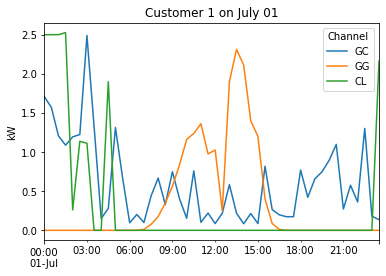

In [89]:
new_df_12[1]['2012-07-01':'2012-07-01'].plot()
plt.title('Customer 1 on July 01')
plt.ylabel('kW')
plt.savefig('Customer Number 1 2010-07 01-02.png', dpi=150);

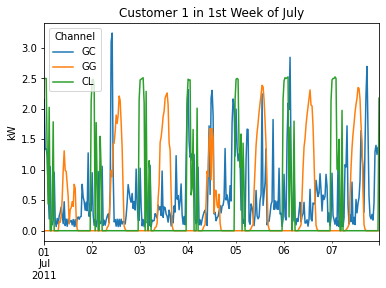

In [90]:
new_df_11[1]['2011-07-01':'2011-07-07'].plot()
plt.title('Customer 1 in 1st Week of July')
plt.ylabel('kW')
plt.savefig('Customer Number 1 2011-07 01-03.png', dpi=150);

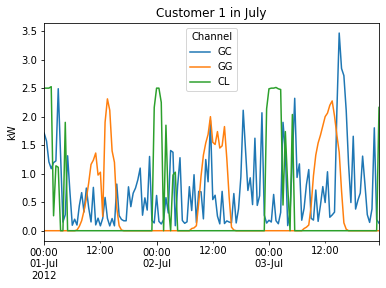

In [91]:
new_df_12[1]['2012-07-01':'2012-07-03'].plot()
plt.title('Customer 1 in July')
plt.ylabel('kW')
plt.savefig('Customer Number 1 2012-07 01-03.png', dpi=150);

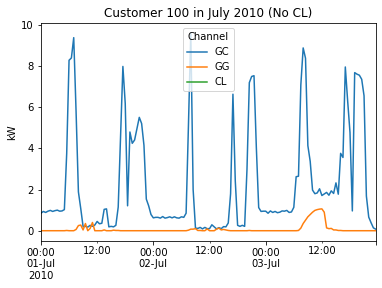

In [92]:
new_df_10[100]['2010-07-01':'2010-07-03'].plot()
plt.ylabel('kW')
plt.title('Customer 100 in July 2010 (No CL)');

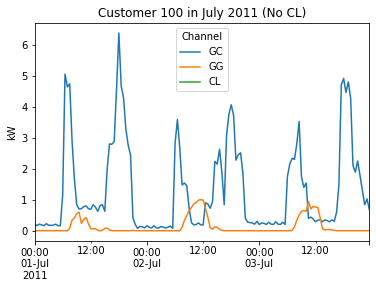

In [93]:
new_df_11[100]['2011-07-01':'2011-07-03'].plot()
plt.ylabel('kW')
plt.title('Customer 100 in July 2011 (No CL)');

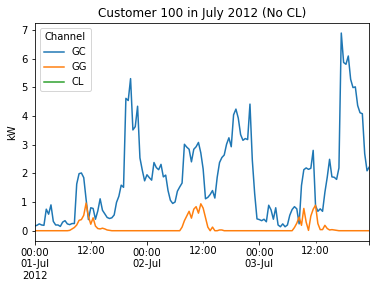

In [94]:
new_df_12[100]['2012-07-01':'2012-07-03'].plot()
plt.ylabel('kW')
plt.title('Customer 100 in July 2012 (No CL)');

In [95]:
cust_df_10 = new_df_10[1]
del cust_df_10['CL']
cust_df_10 /= 2
cust_df_10

Channel,GC,GG
2010-07-01 00:00:00,0.303,0.0
2010-07-01 00:30:00,0.471,0.0
2010-07-01 01:00:00,0.083,0.0
2010-07-01 01:30:00,0.121,0.0
2010-07-01 02:00:00,0.361,0.0
...,...,...
2011-06-30 21:30:00,0.228,0.0
2011-06-30 22:00:00,0.458,0.0
2011-06-30 22:30:00,0.685,0.0
2011-06-30 23:00:00,0.650,0.0


In [96]:
new_dfGC_10_1 = new_df_10.xs('GC', level='Channel', axis=1)
new_dfGC_10_1[[1,2,3,4]]

Customer,1,2,3,4
2010-07-01 00:00:00,0.606,0.170,1.338,0.150
2010-07-01 00:30:00,0.942,0.284,1.342,0.172
2010-07-01 01:00:00,0.166,0.164,1.350,0.170
2010-07-01 01:30:00,0.242,0.238,1.366,0.168
2010-07-01 02:00:00,0.722,0.210,1.388,0.168
...,...,...,...,...
2011-06-30 21:30:00,0.456,0.492,0.918,0.224
2011-06-30 22:00:00,0.916,0.604,0.912,0.200
2011-06-30 22:30:00,1.370,0.696,1.444,0.212
2011-06-30 23:00:00,1.300,0.496,0.120,0.218


In [97]:
new_dfGG_10 = new_df_10.xs('GG', level='Channel', axis=1)
new_dfGG_10[[1, 4, 100]]

Customer,1,4,100
2010-07-01 00:00:00,0.0,0.0,0.000
2010-07-01 00:30:00,0.0,0.0,0.000
2010-07-01 01:00:00,0.0,0.0,0.000
2010-07-01 01:30:00,0.0,0.0,0.000
2010-07-01 02:00:00,0.0,0.0,0.000
...,...,...,...
2011-06-30 21:30:00,0.0,0.0,0.000
2011-06-30 22:00:00,0.0,0.0,0.000
2011-06-30 22:30:00,0.0,0.0,0.000
2011-06-30 23:00:00,0.0,0.0,0.012


In [98]:
new_dfGG_11 = new_df_11.xs('GG', level='Channel', axis=1)
new_dfGG_11[[1, 4, 100]]

Customer,1,4,100
2011-07-01 00:00:00,0.0,0.0,0.0
2011-07-01 00:30:00,0.0,0.0,0.0
2011-07-01 01:00:00,0.0,0.0,0.0
2011-07-01 01:30:00,0.0,0.0,0.0
2011-07-01 02:00:00,0.0,0.0,0.0
...,...,...,...
2012-06-30 21:30:00,0.0,0.0,0.0
2012-06-30 22:00:00,0.0,0.0,0.0
2012-06-30 22:30:00,0.0,0.0,0.0
2012-06-30 23:00:00,0.0,0.0,0.0


In [99]:
new_dfGG_12 = new_df_12.xs('GG', level='Channel', axis=1)
new_dfGG_12[[1, 4, 100]]

Customer,1,4,100
2012-07-01 00:00:00,0.0,0.0,0.0
2012-07-01 00:30:00,0.0,0.0,0.0
2012-07-01 01:00:00,0.0,0.0,0.0
2012-07-01 01:30:00,0.0,0.0,0.0
2012-07-01 02:00:00,0.0,0.0,0.0
...,...,...,...
2013-06-30 21:30:00,0.0,0.0,0.0
2013-06-30 22:00:00,0.0,0.0,0.0
2013-06-30 22:30:00,0.0,0.0,0.0
2013-06-30 23:00:00,0.0,0.0,0.0


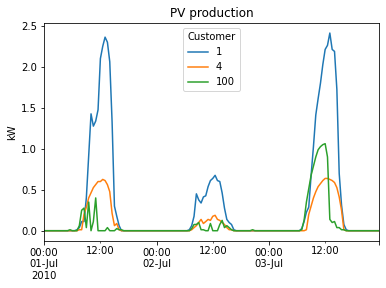

In [100]:
new_dfGG_10[[1, 4, 100]]['2010-07-01':'2010-07-03'].plot()
plt.title('PV production')
plt.ylabel('kW')
plt.savefig('PV production 2010-07 01-03.png', dpi=150);

In [ ]:
new_dfGG_11[[1, 4, 100]]['2011-07-01':'2011-07-03'].plot()
plt.title('PV production')
plt.ylabel('kW')
plt.savefig('PV production 2011-07 01-03.png', dpi=150);

In [ ]:
new_dfGG_12[[1, 4, 100]]['2012-07-01':'2012-07-03'].plot()
plt.title('PV production')
plt.ylabel('kW')
plt.savefig('PV production 2012-07 01-03.png', dpi=150);

In [ ]:
d_cust_cap_10 = solar_df_10[['Customer', 'Generator Capacity']]
d_cust_cap_10.iloc[[0,1,2000, -1]]

In [ ]:
d_cust_cap_11 = solar_df_11[['Customer', 'Generator Capacity']]
d_cust_cap_11.iloc[[0,1,2000, -1]]

In [ ]:
d_cust_cap_12 = solar_df_12[['Customer', 'Generator Capacity']]
d_cust_cap_12.iloc[[0,1,2000, -1]]

In [ ]:
d_cust_cap_10.groupby('Customer')['Generator Capacity'].nunique().value_counts()

In [ ]:
d_cust_cap_11.groupby('Customer')['Generator Capacity'].nunique().value_counts()

In [ ]:
d_cust_cap_12.groupby('Customer')['Generator Capacity'].nunique().value_counts()

In [ ]:
gen_cap_10 = d_cust_cap_10.groupby('Customer')['Generator Capacity'].mean()
gen_cap_10.describe(percentiles=[0.5, 0.8, 0.9, 0.980])

In [ ]:
gen_cap_11 = d_cust_cap_11.groupby('Customer')['Generator Capacity'].mean()
gen_cap_11.describe(percentiles=[0.5, 0.8, 0.9, 0.980])

In [ ]:
gen_cap_12 = d_cust_cap_12.groupby('Customer')['Generator Capacity'].mean()
gen_cap_12.describe(percentiles=[0.5, 0.8, 0.9, 0.980])

In [ ]:
ax = gen_cap_10.hist(bins=20)
ax.set(xlabel='PV gen capacity 2010 (kW)')

In [ ]:
ax = gen_cap_11.hist(bins=20)
ax.set(xlabel='PV gen capacity 2011 (kW)')

In [ ]:
ax = gen_cap_12.hist(bins=20)
ax.set(xlabel='PV gen capacity 2012 (kW)')

In [ ]:
gen_cap_10[1]

In [ ]:
gen_cap_11[1]

In [ ]:
gen_cap_12[1]

In [ ]:
new_dfGG_10[1].resample('1D').max().plot(label='daily max')
plt.title('PV production (daily max) of customer 1 ')
plt.ylabel('kWh')
plt.hlines(gen_cap_10[1], new_df_10.index[0], new_df_10.index[-1], linestyles='dashed', color='tab:red', label='PV capacity')
plt.legend();

In [ ]:
new_dfGG_11[1].resample('1D').max().plot(label='daily max')
plt.title('PV production (daily max) of customer 1 ')
plt.ylabel('kWh')
plt.hlines(gen_cap_11[1], new_df_11.index[0], new_df_11.index[-1], linestyles='dashed', color='tab:red', label='PV capacity')
plt.legend();

In [ ]:
new_dfGG_12[1].resample('1D').max().plot(label='daily max')
plt.title('PV production (daily max) of customer 1 ')
plt.ylabel('kWh')
plt.hlines(gen_cap_12[1], new_df_12.index[0], new_df_12.index[-1], linestyles='dashed', color='tab:red', label='PV capacity')
plt.legend();

In [ ]:
dt_10 = 0.5 # hours
GG_year_10 = new_dfGG_10.sum()*dt_10
GG_year_10.mean(), GG_year_10.median()

In [ ]:
dt_11 = 0.5 # hours
GG_year_11 = new_dfGG_11.sum()*dt_11
GG_year_11.mean(), GG_year_11.median()

In [ ]:
dt_12 = 0.5 # hours
GG_year_12 = new_dfGG_12.sum()*dt_12
GG_year_12.mean(), GG_year_12.median()

In [ ]:
pv_perf_10 = GG_year_10/gen_cap_10
pv_perf_10.mean()

In [ ]:
pv_perf_11 = GG_year_11/gen_cap_11
pv_perf_11.mean()

In [ ]:
pv_perf_12 = GG_year_12/gen_cap_12
pv_perf_12.mean()

In [ ]:
pv_perf_10.hist(bins=30)
plt.xlabel('yearly PV production kWh/kWp');

In [ ]:
pv_perf_11.hist(bins=30)
plt.xlabel('yearly PV production kWh/kWp');

In [ ]:
pv_perf_12.hist(bins=30)
plt.xlabel('yearly PV production kWh/kWp');

In [ ]:
new_dfGC_10 = new_df_10.xs('GC', level='Channel', axis=1)
new_dfCL_10 = new_df_10.xs('CL', level='Channel', axis=1)

In [ ]:
new_dfGC_11 = new_df_11.xs('GC', level='Channel', axis=1)
new_dfCL_11 = new_df_11.xs('CL', level='Channel', axis=1)

In [ ]:
new_dfGC_12 = new_df_12.xs('GC', level='Channel', axis=1)
new_dfCL_12 = new_df_12.xs('CL', level='Channel', axis=1)

In [ ]:
dt_10 = 0.5 # hours
GC_year_10 = new_dfGC_10.sum()*dt_10
CL_year_10 = new_dfCL_10.sum()*dt_10

GC_year_10.mean(), CL_year_10.mean(), GC_year_10.mean()+  CL_year_10.mean(), (GC_year_10 +  CL_year_10).mean()

In [ ]:
dt_11 = 0.5 # hours
GC_year_11 = new_dfGC_11.sum()*dt_11
CL_year_11 = new_dfCL_11.sum()*dt_11

GC_year_11.mean(), CL_year_11.mean(), GC_year_11.mean()+  CL_year_11.mean(), (GC_year_11 +  CL_year_11).mean()

In [ ]:
dt_12 = 0.5 # hours
GC_year_12 = new_dfGC_12.sum()*dt_12
CL_year_12 = new_dfCL_12.sum()*dt_12

GC_year_12.mean(), CL_year_12.mean(), GC_year_12.mean()+  CL_year_12.mean(), (GC_year_12 +  CL_year_12).mean()

In [ ]:
GC_year_10 +  CL_year_10

In [ ]:
GC_year_11 +  CL_year_11

In [ ]:
GC_year_12 +  CL_year_12

In [ ]:
Cons_y_10 = pd.DataFrame({'GCy': GC_year_10, 'CLy':  CL_year_10})
Cons_y_10.sum(axis=1)

In [ ]:
Cons_y_11 = pd.DataFrame({'GCy': GC_year_11, 'CLy':  CL_year_11})
Cons_y_11.sum(axis=1)

In [ ]:
Cons_y_12 = pd.DataFrame({'GCy': GC_year_12, 'CLy':  CL_year_12})
Cons_y_12.sum(axis=1)

In [ ]:
Cons_y_10.sum(axis=1).mean()

In [ ]:
Cons_y_11.sum(axis=1).mean()

In [ ]:
Cons_y_12.sum(axis=1).mean()

In [ ]:
Cons_y_10.sum(axis=1).hist(bins=30)

In [ ]:
Cons_y_11.sum(axis=1).hist(bins=30)

In [ ]:
Cons_y_12.sum(axis=1).hist(bins=30)

In [ ]:
Cons_10 = new_dfGC_10.add(new_dfCL_10, fill_value=0) 
Cons_10.max().describe()

In [ ]:
Cons_11 = new_dfGC_10.add(new_dfCL_11, fill_value=0) 
Cons_11.max().describe()

In [ ]:
Cons_12 = new_dfGC_12.add(new_dfCL_12, fill_value=0) 
Cons_12.max().describe()

In [ ]:
Cons_10.max().hist(bins=30)
plt.xlabel('Max consumption (kW)');

In [ ]:
Cons_11.max().hist(bins=30)
plt.xlabel('Max consumption (kW)');

In [ ]:
Cons_12.max().hist(bins=30)
plt.xlabel('Max consumption (kW)');

In [ ]:
Cons_hours_10 = Cons_y_10.sum(axis=1)/Cons_10.max()
Cons_hours_10.describe()

In [ ]:
Cons_hours_11 = Cons_y_11.sum(axis=1)/Cons_11.max()
Cons_hours_11.describe()

In [ ]:
Cons_hours_12 = Cons_y_12.sum(axis=1)/Cons_12.max()
Cons_hours_12.describe()

In [ ]:
Cons_hours_10.hist(bins=30)

In [ ]:
Cons_hours_11.hist(bins=30)

In [ ]:
Cons_hours_12.hist(bins=30)

In [ ]:
# Single Customer:

In [ ]:
cust_df_10 = new_df_10[1]
del cust_df_10['CL']
cust_df_10 /= 2
cust_df_10

In [ ]:
cust_df_10 = new_df_10[2]
del cust_df_10['CL']
cust_df_10 /= 2
cust_df_10

In [ ]:
cust_df_11 = new_df_11[100]
del cust_df_11['CL']
cust_df_11 /= 2
cust_df_11

In [ ]:
cust_df_12 = new_df_12[100]
del cust_df_12['CL']
cust_df_12 /= 2
cust_df_12

In [ ]:
cust_df_10.describe([])

In [ ]:
cust_df_11.describe([])

In [ ]:
cust_df_12.describe([])

In [ ]:
prod_10 = cust_df_10.GG
cons_10 = cust_df_10.GC
cons_10.hist(bins=30, label='Consumption')
(prod_10[prod_10>=0.01]).hist(label='PV prod (>0)', alpha=0.8)
plt.legend();

In [ ]:
prod_11 = cust_df_11.GG
cons_11 = cust_df_11.GC
cons_11.hist(bins=30, label='Consumption')
(prod_11[prod_11>=0.01]).hist(label='PV prod (>0)', alpha=0.8)
plt.legend();

In [ ]:
prod_12 = cust_df_12.GG
cons_12 = cust_df_12.GC
cons_12.hist(bins=30, label='Consumption')
(prod_12[prod_12>=0.01]).hist(label='PV prod (>0)', alpha=0.8)
plt.legend();

In [ ]:
dt_10 = 0.5 # hours
E_pv_10 = prod_10.sum() * dt_10
E_pv_10

In [ ]:
dt_11 = 0.5 # hours
E_pv_11 = prod_11.sum() * dt_11
E_pv_11

In [ ]:
dt_12 = 0.5 # hours
E_pv_12 = prod_12.sum() * dt_12
E_pv_12

In [ ]:
gen_c_10 = gen_cap_10[100]
gen_c_10

In [ ]:
gen_c_11 = gen_cap_11[100]
gen_c_11

In [ ]:
gen_c_12 = gen_cap_12[100]
gen_c_12

In [ ]:
E_pv_10/gen_c_10

In [ ]:
E_pv_11/gen_c_11

In [ ]:
E_pv_12/gen_c_12

In [ ]:
E_cons_10 = cons_10.sum() * dt_10
E_cons_10

In [ ]:
E_cons_11 = cons_11.sum() * dt_11
E_cons_11

In [ ]:
E_cons_12 = cons_12.sum() * dt_12
E_cons_12

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

sl_10 = slice('2010-11-29','2010-12-05')
cons_10[sl_10].plot(ax=ax1, label='Consumption')
prod_10[sl_10].plot(ax=ax2, color='tab:orange', label='PV production')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

ax1.set(
    title='Customer %d data: 7 days extract' % 100,
    ylabel='Power (kW)'
)
ax2.set(
    ylabel='Power (kW)'
);

fig.tight_layout()
fig.savefig('data_week_%s.png' % sl_10.start, dpi=200, bbox_inches='tight')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

sl_11 = slice('2011-11-29','2011-12-05')
cons_11[sl_11].plot(ax=ax1, label='Consumption')
prod_11[sl_11].plot(ax=ax2, color='tab:orange', label='PV production')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

ax1.set(
    title='Customer %d data: 7 days extract' % 100,
    ylabel='Power (kW)'
)
ax2.set(
    ylabel='Power (kW)'
);

fig.tight_layout()
fig.savefig('data_week_%s.png' % sl_11.start, dpi=200, bbox_inches='tight')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

sl_12 = slice('2012-11-29','2012-12-05')
cons_12[sl_12].plot(ax=ax1, label='Consumption')
prod_12[sl_12].plot(ax=ax2, color='tab:orange', label='PV production')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

ax1.set(
    title='Customer %d data: 7 days extract' % 100,
    ylabel='Power (kW)'
)
ax2.set(
    ylabel='Power (kW)'
);

fig.tight_layout()
fig.savefig('data_week_%s.png' % sl_12.start, dpi=200, bbox_inches='tight')

In [ ]:
def hod_10(tstamp_10):
    'hour of the day (fractional))'
    return tstamp_10.hour + tstamp_10.minute/60

d_dm_10 = cust_df_10.groupby(by=hod_10).mean()
d_d05_10 = cust_df_10.groupby(by=hod_10).quantile(.05)
d_d25_10 = cust_df_10.groupby(by=hod_10).quantile(.25)
d_d75_10 = cust_df_10.groupby(by=hod_10).quantile(.75)
d_d95_10 = cust_df_10.groupby(by=hod_10).quantile(.95)

In [ ]:
def hod_11(tstamp_11):
    'hour of the day (fractional))'
    return tstamp_11.hour + tstamp_11.minute/60

d_dm_11 = cust_df_11.groupby(by=hod_11).mean()
d_d05_11 = cust_df_11.groupby(by=hod_11).quantile(.05)
d_d25_11 = cust_df_11.groupby(by=hod_11).quantile(.25)
d_d75_11 = cust_df_11.groupby(by=hod_11).quantile(.75)
d_d95_11 = cust_df_11.groupby(by=hod_11).quantile(.95)

In [ ]:
def hod_12(tstamp_12):
    'hour of the day (fractional))'
    return tstamp_12.hour + tstamp_12.minute/60

d_dm_12 = cust_df_12.groupby(by=hod_12).mean()
d_d05_12 = cust_df_12.groupby(by=hod_12).quantile(.05)
d_d25_12 = cust_df_12.groupby(by=hod_12).quantile(.25)
d_d75_12 = cust_df_12.groupby(by=hod_12).quantile(.75)
d_d95_12 = cust_df_12.groupby(by=hod_12).quantile(.95)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

c = 'tab:blue'
d_dm_10.GC.plot(ax=ax1, color=c, label='Consumption')
ax1.fill_between(d_dm_10.index, d_d05_10.GC, d_d95_10.GC, alpha=0.3, color=c, lw=0)
ax1.fill_between(d_dm_10.index, d_d25_10.GC, d_d75_10.GC, alpha=0.3, color=c, lw=0)
ax1.set_ylim(ymin=0)
ax1.legend(loc='upper left')

c = 'tab:orange'
d_dm_10.GG.plot(ax=ax2, color=c, label='PV production')
ax2.fill_between(d_dm_10.index, d_d05_10.GG, d_d95_10.GG, alpha=0.3, color=c, lw=0)
ax2.fill_between(d_dm_10.index, d_d25_10.GG, d_d75_10.GG, alpha=0.3, color=c, lw=0)
ax2.legend(loc='upper left')

ax1.set(
    title='Customer %d daily pattern' % 100,
    ylabel='Power (kW)'
);
ax2.set(
    xlabel='hour of the day',
    ylabel='Power (kW)'
);
fig.tight_layout()
fig.savefig('daily_pattern_2010-2011.png', dpi=200, bbox_inches='tight')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

c = 'tab:blue'
d_dm_11.GC.plot(ax=ax1, color=c, label='Consumption')
ax1.fill_between(d_dm_11.index, d_d05_11.GC, d_d95_11.GC, alpha=0.3, color=c, lw=0)
ax1.fill_between(d_dm_11.index, d_d25_11.GC, d_d75_11.GC, alpha=0.3, color=c, lw=0)
ax1.set_ylim(ymin=0)
ax1.legend(loc='upper left')

c = 'tab:orange'
d_dm_11.GG.plot(ax=ax2, color=c, label='PV production')
ax2.fill_between(d_dm_11.index, d_d05_11.GG, d_d95_11.GG, alpha=0.3, color=c, lw=0)
ax2.fill_between(d_dm_11.index, d_d25_11.GG, d_d75_11.GG, alpha=0.3, color=c, lw=0)
ax2.legend(loc='upper left')

ax1.set(
    title='Customer %d daily pattern' % 100,
    ylabel='Power (kW)'
);
ax2.set(
    xlabel='hour of the day',
    ylabel='Power (kW)'
);
fig.tight_layout()
fig.savefig('daily_pattern_2011-2012.png', dpi=200, bbox_inches='tight')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

c = 'tab:blue'
d_dm_12.GC.plot(ax=ax1, color=c, label='Consumption')
ax1.fill_between(d_dm_12.index, d_d05_12.GC, d_d95_12.GC, alpha=0.3, color=c, lw=0)
ax1.fill_between(d_dm_12.index, d_d25_12.GC, d_d75_12.GC, alpha=0.3, color=c, lw=0)
ax1.set_ylim(ymin=0)
ax1.legend(loc='upper left')

c = 'tab:orange'
d_dm_12.GG.plot(ax=ax2, color=c, label='PV production')
ax2.fill_between(d_dm_12.index, d_d05_12.GG, d_d95_12.GG, alpha=0.3, color=c, lw=0)
ax2.fill_between(d_dm_12.index, d_d25_12.GG, d_d75_12.GG, alpha=0.3, color=c, lw=0)
ax2.legend(loc='upper left')

ax1.set(
    title='Customer %d daily pattern' % 100,
    ylabel='Power (kW)'
);
ax2.set(
    xlabel='hour of the day',
    ylabel='Power (kW)'
);
fig.tight_layout()
fig.savefig('daily_pattern_2012-2013.png', dpi=200, bbox_inches='tight')

In [ ]:
quantiles_10 = np.linspace(0.05, 0.95, 19)
quantiles_10

In [ ]:
quantiles_11 = np.linspace(0.05, 0.95, 19)
quantiles_11

In [ ]:
quantiles_12 = np.linspace(0.05, 0.95, 19)
quantiles_12

In [ ]:
def daily_pattern_10(ts_10):
    dstats_10 = pd.DataFrame({
        'q{:02.0f}'.format(q*100) : ts_10.groupby(by=hod_10).quantile(q)
        for q in quantiles
    })
    dstats_10.insert(0, 'min',  ts_10.groupby(by=hod_10).min())
    dstats_10.insert(0, 'mean', ts_10.groupby(by=hod_10).mean())
    dstats_10['max'] = ts_10.groupby(by=hod_10).max()
    return dstats_10

In [ ]:
def daily_pattern_11(ts_11):
    dstats_11 = pd.DataFrame({
        'q{:02.0f}'.format(q*100) : ts_11.groupby(by=hod_11).quantile(q)
        for q in quantiles
    })
    dstats_11.insert(0, 'min',  ts_11.groupby(by=hod_11).min())
    dstats_11.insert(0, 'mean', ts_11.groupby(by=hod_11).mean())
    dstats_11['max'] = ts_11.groupby(by=hod_11).max()
    return dstats_11

In [ ]:
def daily_pattern_12(ts_12):
    dstats_12 = pd.DataFrame({
        'q{:02.0f}'.format(q*100) : ts_12.groupby(by=hod_12).quantile(q)
        for q in quantiles
    })
    dstats_12.insert(0, 'min',  ts_12.groupby(by=hod_12).min())
    dstats_12.insert(0, 'mean', ts_12.groupby(by=hod_12).mean())
    dstats_12['max'] = ts_12.groupby(by=hod_12).max()
    return dstats_12

In [ ]:
def plot_daily_pattern(dstats, title):
    fig, ax = plt.subplots(1,1)
    
    q_names = [c for c in dstats.columns if c.startswith('q')]
    
    dstats[q_names[:9]].plot(ax=ax, color='tab:blue', lw=0.5)
    dstats['q50'].plot(ax=ax, color='k')
    dstats[q_names[11:]].plot(ax=ax, color='tab:red', lw=0.5)
    dstats['min'].plot(ax=ax, color='tab:blue', label='min')
    dstats['max'].plot(ax=ax, color='tab:red')
    dstats['mean'].plot(ax=ax, color='k', lw=6, alpha=0.5)
    plt.legend(ax.lines[-3:], ['min', 'max', 'mean']);
    
    ax.set(
        xlabel='hour of the day',
        ylabel='Power (kW)',
        title=title)
    fig.tight_layout()
    return fig, ax

### Weather Data

In [ ]:
weather = pd.read_csv('weatherAUS.csv')

In [ ]:
weather

In [ ]:
new_df_1 = new_df_10[1]
del new_df_1['CL']
new_df_1.reset_index(inplace=True)
new_df_1 = new_df_1.rename(columns={'index': 'dt'})
new_df_1['Date'] = new_df_1['dt'].dt.date
new_df_1['Time'] = new_df_1['dt'].dt.time

In [ ]:
j = 0

for i in range(len(weather)):
    if(str(weather['Date'][i]) == str(new_df_1['Date'][0])):
        j = i
        break
count = 0
b = []
c = []
d = []
e = []
for i in range(len(new_df_1)):
    if(str(new_df_1['Date'][i]) == str(weather['Date'][j])):
        a = np.linspace(weather['MinTemp'][j],weather['MaxTemp'][j], num = 48)
        b.append(a[count])
        c.append(weather['MinTemp'][j])
        d.append(weather['MaxTemp'][j])
        e.append(weather['Rainfall'][j])
        count = count + 1
        if(count == 48):
            count = 0
            j = j + 1
    else:
        b.append(np.nan)
        c.append(np.nan)
        d.append(np.nan)
        e.append(np.nan)
        count = count + 1
        if(count == 48):
            count = 0

In [ ]:
new_df_1['Temp'] = b
new_df_1['min_temp'] = c
new_df_1['max_temp'] = d
new_df_1['Rainfall'] = e

In [ ]:
new_df_1

In [ ]:
new_df_1[new_df_1.isnull().any(axis=1)]

In [ ]:
new_df_1.interpolate(method='ffill', limit_direction='forward', inplace=True)

In [ ]:
new_df_1[new_df_1.isnull().any(axis=1)]

In [ ]:
new_df_1

In [ ]:
dtf = new_df_1[['min_temp','max_temp','Rainfall','GC']]
dtf

In [ ]:
dtf[dtf.isnull().any(axis=1)]

In [ ]:
train_set_1 = dtf.iloc[:17520].values

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scale = sc.fit_transform(dtf)
print(x_scale.shape)

In [ ]:
sc2 = StandardScaler()
y_scale = sc2.fit_transform(dtf[['GC']])
print(y_scale.shape)

### Preparing Training Data

In [ ]:
x_train_1 = []
y_train_1 = []
y_train_2 = []
for i in range(48, 17520):
    x_train_1.append(x_scale[i-48:i])
    y_train_1.append(y_scale[i][0])
    y_train_2.append(x_scale[i])
    
x_train_1, y_train_1 = np.array(x_train_1), np.array(y_train_1)
y_train_2 = np.array(y_train_2)
x_train_1 = np.reshape(x_train_1, (x_train_1.shape[0], x_train_1.shape[1], 4))
y_train_2 = np.reshape(y_train_2, (y_train_2.shape[0], 1, 4))
print(x_train_1.shape)

In [ ]:
y_train_2.shape

### Modelling 

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_1.shape[1], 4)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train_1, y_train_1, epochs = 20, batch_size = 32)

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(units = 50, return_sequences = True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units = 50, return_sequences = True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units = 50))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units = 1))
model_gru.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_gru.fit(x_train_1, y_train_1, epochs = 20, batch_size = 32)

In [ ]:
model_bi = Sequential()
model_bi.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model_bi.add(Dropout(0.2))
model_bi.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
model_bi.add(Dropout(0.2))
model_bi.add(Bidirectional(LSTM(units = 50)))
model_bi.add(Dropout(0.2))
model_bi.add(Dense(units = 1))
model_bi.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_bi.fit(x_train_1, y_train_1, epochs = 20, batch_size = 64)

In [ ]:
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input, BatchNormalization, concatenate, Flatten, Activation, dot
from keras.optimizers import Adam

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(48, 4))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(1)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

In [ ]:
opt = Adam(lr=0.01, clipnorm=1)
model_e2d2.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model_e2d2.fit(x_train_1, y_train_2, validation_split=0.2, epochs = 20, verbose = 1, batch_size = 32)

In [ ]:
x_train_xgb = []
for i in range(48, 17520):
    x_train_xgb.append(y_scale[i-48:i])
    
x_train_xgb = np.array(x_train_xgb)

In [ ]:
x_train_xgb.shape

In [ ]:
x_train_xgb = np.reshape(x_train_xgb, (x_train_xgb.shape[0], x_train_xgb.shape[1]))

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model_xgb.fit(x_train_xgb, y_train_1)

In [ ]:
# Prediction

In [ ]:
predicted_lstm = model.predict(x_train_1)

In [ ]:
predicted_gru = model_gru.predict(x_train_1)

In [ ]:
predicted_bi = model_bi.predict(x_train_1)

In [ ]:
pred_e2d2 = model_e2d2.predict(x_train_1)

In [ ]:
predicted_xgb = model_xgb.predict(x_train_xgb)

In [ ]:
pred_e2d2 = np.reshape(pred_e2d2, (pred_e2d2.shape[0], pred_e2d2.shape[2]))
pe2d2 = pd.DataFrame(pred_e2d2)
predicted_e2d2 = np.array(pe2d2[0])

In [ ]:
predicted_lstm

In [ ]:
predicted_e2d2

In [ ]:
predicted_ense = []
for i in range(0, 17472):
    predicted_en = (predicted_lstm[i]+predicted_gru[i]+predicted_bi[i]+predicted_e2d2+predicted_xgb[i])/5
    predicted_ense.append(predicted_en[0])

In [ ]:
predicted_e2d2 = np.reshape(predicted_e2d2, (predicted_e2d2.shape[0], 1))
predicted_xgb = np.reshape(predicted_xgb, (predicted_xgb.shape[0], 1))

In [ ]:
y_train = sc2.inverse_transform(y_scale)
pre_lstm = sc2.inverse_transform(predicted_lstm)
pre_gru = sc2.inverse_transform(predicted_gru)
pre_bi = sc2.inverse_transform(predicted_bi)
pre_e2d2 = sc2.inverse_transform(predicted_e2d2)
pre_xgb = sc2.inverse_transform(predicted_xgb)

In [ ]:
pre_ense = (pre_lstm + pre_gru + pre_bi + pre_e2d2 + pre_xgb)/5

### Result

In [ ]:
mae_lstm = mean_absolute_error(y_train[48:], pre_lstm)
mse_lstm = mean_squared_error(y_train[48:], pre_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_train[48:], pre_lstm)
r2_adj_lstm = 1-(1-r2_lstm)*(1632-1)/(1632-48-1)

mae_gru = mean_absolute_error(y_train[48:], pre_gru)
mse_gru = mean_squared_error(y_train[48:], pre_gru)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_train[48:], pre_gru)
r2_adj_gru = 1-(1-r2_gru)*(1632-1)/(1632-48-1)

mae_bi = mean_absolute_error(y_train[48:], pre_bi)
mse_bi = mean_squared_error(y_train[48:], pre_bi)
rmse_bi = np.sqrt(mse_bi)
r2_bi = r2_score(y_train[48:], pre_bi)
r2_adj_bi = 1-(1-r2_bi)*(1632-1)/(1632-48-1)

mae_xgb = mean_absolute_error(y_train[48:], pre_xgb)
mse_xgb = mean_squared_error(y_train[48:], pre_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_train[48:], pre_xgb)
r2_adj_xgb = 1-(1-r2_xgb)*(1632-1)/(1632-48-1)

mae_e2d2 = mean_absolute_error(y_train[48:], pre__e2d2)
mse_e2d2 = mean_squared_error(y_train[48:], pre__e2d2)
rmse_e2d2 = np.sqrt(mse_e2d2)
r2_e2d2 = r2_score(y_train[48:], pre__e2d2)
r2_adj_e2d2 = 1-(1-r2_e2d2)*(1632-1)/(1632-48-1)

mae_en = mean_absolute_error(y_train[48:], pre_ense)
mse_en = mean_squared_error(y_train[48:], pre_ense)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_train[48:], pre_ense)
r2_adj_en = 1-(1-r2_en)*(1632-1)/(1632-48-1)

In [ ]:
print("MAE LSTM",mae_lstm)
print("MSE LSTM",mse_lstm)
print("RMSE LSTM",rmse_lstm)
print("R2 Score LSTM",r2_lstm)
# print(r2_adj_lstm)
print("-------------------------")
print("MAE GRU",mae_gru)
print("MSE GRU",mse_gru)
print("RMSE GRU",rmse_gru)
print("R2 Score GRU",r2_gru)
# print(r2_adj_gru)
print("-------------------------")
print("MAE Bi",mae_bi)
print("MSE Bi",mse_bi)
print("RMSE Bi",rmse_bi)
print("R2 Score Bi",r2_bi)
# print(r2_adj_bi)
print("-------------------------")
print("MAE XGB",mae_xgb)
print("MSE XGB",mse_xgb)
print("RMSE XGB",rmse_xgb)
print("R2 Score XGB",r2_xgb)
# print(r2_adj_xgb)
print("-------------------------")
print("MAE SEQ",mae_e2d2)
print("MSE SEQ",mse_e2d2)
print("RMSE SEQ",rmse_e2d2)
print("R2 Score SEQ",r2_e2d2)
# print(r2_adj_xgb)
print("-------------------------")
print("MAE Ense",mae_en)
print("MSE Ense",mse_en)
print("RMSE Ense",rmse_en)
print("R2 Score Ense",r2_en)
# print(r2_adj_en)

In [ ]:
dataset_train = new_df_1.iloc[:17472]

### Actual vs Predicted Analysis

In [ ]:
plt.plot(dataset_train.dt, dataset_train.GC, color = 'red', label = 'Real Load')
plt.plot(dataset_train.dt, pre_lstm, color = 'blue', label = 'LSTM Predicted Load')
plt.xticks(np.arange(0,1680,1680))
plt.title('House 1 Montly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
week_1_true_lstm = []
week_1_predicted_lstm = []
b = dataset_train.GC
for i in range(0, 336):
    week_1_true_lstm.append(b[i])
    week_1_predicted_lstm.append(pre_lstm[i])

In [ ]:
plt.plot(week_1_true_lstm, color = 'red', label = 'Real Load')
plt.plot(week_1_predicted_lstm, color = 'blue', label = 'LSTM Predicted Load')
plt.xticks(np.arange(0,336,336))
plt.title('House 1 Weekly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
day_1_true_lstm = []
day_1_predicted_lstm = []
b = dataset_train.GC
for i in range(0, 48):
    day_1_true_lstm.append(b[i])
    day_1_predicted_lstm.append(pre_lstm[i])

In [ ]:
plt.plot(day_1_true_lstm, color = 'red', label = 'Real Load')
plt.plot(day_1_predicted_lstm, color = 'blue', label = 'LSTM Predicted Load')
plt.xticks(np.arange(0,48,48))
plt.title('House 1 Daily Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
plt.plot(dataset_train.dt, dataset_train.GC, color = 'red', label = 'Real Load')
plt.plot(dataset_train.dt, pre_gru, color = 'blue', label = 'GRU Predicted Load')
plt.xticks(np.arange(0,1680,1680))
plt.title('House 1 Montly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
week_1_true_gru = []
week_1_predicted_gru = []
b = dataset_train.GC
for i in range(0, 336):
    week_1_true_gru.append(b[i])
    week_1_predicted_gru.append(pre_gru[i])

In [ ]:
plt.plot(week_1_true_gru, color = 'red', label = 'Real Load')
plt.plot(week_1_predicted_gru, color = 'blue', label = 'GRU Predicted Load')
plt.xticks(np.arange(0,336,336))
plt.title('House 1 Weekly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
day_1_true_gru = []
day_1_predicted_gru = []
b = dataset_train.GC
for i in range(0, 48):
    day_1_true_gru.append(b[i])
    day_1_predicted_gru.append(pre_gru[i])

In [ ]:
plt.plot(day_1_true_lstm, color = 'red', label = 'Real Load')
plt.plot(day_1_predicted_gru, color = 'blue', label = 'GRU Predicted Load')
plt.xticks(np.arange(0,48,48))
plt.title('House 1 Daily Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
plt.plot(dataset_train.dt, dataset_train.GC, color = 'red', label = 'Real Load')
plt.plot(dataset_train.dt, predicted_bi, color = 'blue', label = 'Bidirectional LSTM Predicted Load')
plt.xticks(np.arange(0,1680,1680))
plt.title('House 1 Montly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
week_1_true_bi = []
week_1_predicted_bi = []
b = dataset_train.GC
for i in range(0, 336):
    week_1_true_bi.append(b[i])
    week_1_predicted_bi.append(pre_bi[i])

In [ ]:
plt.plot(week_1_true_bi, color = 'red', label = 'Real Load')
plt.plot(week_1_predicted_bi, color = 'blue', label = 'Bidirectional LSTM Predicted Load')
plt.xticks(np.arange(0,336,336))
plt.title('House 1 Weekly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
day_1_true_bi = []
day_1_predicted_bi = []
b = dataset_train.GC
for i in range(0, 48):
    day_1_true_bi.append(b[i])
    day_1_predicted_bi.append(predicted_bi[i])

In [ ]:
plt.plot(day_1_true_bi, color = 'red', label = 'Real Load')
plt.plot(day_1_predicted_bi, color = 'blue', label = 'Bidirectional LSTM Predicted Load')
plt.xticks(np.arange(0,48,48))
plt.title('House 1 Daily Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
plt.plot(dataset_train.dt, dataset_train.GC, color = 'red', label = 'Real Load')
plt.plot(dataset_train.dt, predicted_xgb, color = 'blue', label = 'XGBoost Predicted Load')
plt.xticks(np.arange(0,1680,1680))
plt.title('House 1 Montly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
week_1_true_xgb = []
week_1_predicted_xgb = []
b = dataset_train.GC
for i in range(0, 336):
    week_1_true_xgb.append(b[i])
    week_1_predicted_xgb.append(pre_xgb[i])

In [ ]:
plt.plot(week_1_true_xgb, color = 'red', label = 'Real Load')
plt.plot(week_1_predicted_xgb, color = 'blue', label = 'XGBoost Predicted Load')
plt.xticks(np.arange(0,336,336))
plt.title('House 1 Weekly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
day_1_true_xgb = []
day_1_predicted_xgb = []
b = dataset_train.GC
for i in range(0, 48):
    day_1_true_xgb.append(b[i])
    day_1_predicted_xgb.append(pre_xgb[i])

In [ ]:
plt.plot(day_1_true_xgb, color = 'red', label = 'Real Load')
plt.plot(day_1_predicted_xgb, color = 'blue', label = 'XGBoost Predicted Load')
plt.xticks(np.arange(0,48,48))
plt.title('House 1 Daily Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
plt.plot(dataset_train.dt, dataset_train.GC, color = 'red', label = 'Real Load')
plt.plot(dataset_train.dt, pre__e2d2, color = 'blue', label = 'Seq-2-seq Predicted Load')
plt.xticks(np.arange(0,1680,1680))
plt.title('House 1 Montly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
week_1_true_e2d2 = []
week_1_predicted_e2d2 = []
b = dataset_train.GC
for i in range(0, 336):
    week_1_true_e2d2.append(b[i])
    week_1_predicted_e2d2.append(pre__e2d2[i])

In [ ]:
plt.plot(week_1_true_e2d2, color = 'red', label = 'Real Load')
plt.plot(week_1_predicted_e2d2, color = 'blue', label = 'Seq-2-seq Predicted Load')
plt.xticks(np.arange(0,336,336))
plt.title('House 1 Weekly Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
day_1_true_e2d2 = []
day_1_predicted_e2d2 = []
b = dataset_train.GC
for i in range(0, 48):
    day_1_true_e2d2.append(b[i])
    day_1_predicted_e2d2.append(pre__e2d2[i])

In [ ]:
plt.plot(day_1_true_e2d2, color = 'red', label = 'Real Load')
plt.plot(day_1_predicted_e2d2, color = 'blue', label = 'Seq-2-seq Predicted Load')
plt.xticks(np.arange(0,48,48))
plt.title('House 1 Daily Load Prediction')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
plt.plot(dataset_train.dt, dataset_train.GC, color = 'red', label = 'Real Load')
plt.plot(dataset_train.dt, pre_ense, color = 'blue', label = 'Ensemble Predicted Load')
plt.xticks(np.arange(0,1680,1680))
plt.title('Average Monthly load prediction for each house in Community')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
week_1_true_en = []
week_1_predicted_en = []
b = dataset_train.GC
for i in range(0, 336):
    week_1_true_en.append(b[i])
    week_1_predicted_en.append(pre_ense[i])

In [ ]:
plt.plot(week_1_true_en, color = 'red', label = 'Real Load')
plt.plot(week_1_predicted_en, color = 'blue', label = 'Ensemble Predicted Load')
plt.xticks(np.arange(0,336,336))
plt.title('Average Weekly load prediction for each house in Community')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
day_1_true_en = []
day_1_predicted_en = []
b = dataset_train.GC
for i in range(0, 48):
    day_1_true_en.append(b[i])
    day_1_predicted_en.append(pre_ense[i])

In [ ]:
plt.plot(day_1_true_en, color = 'red', label = 'Real Load')
plt.plot(day_1_predicted_en, color = 'blue', label = 'Ensemble Predicted Load')
plt.xticks(np.arange(0,48,48))
plt.title('Average Daily load prediction for each house in Community')
plt.xlabel('Time (30 Minutes interval)')
plt.ylabel('Load')
plt.legend()
plt.show()

In [ ]:
lstm1 = pd.DataFrame(dataset_train['Date'])
lstm1['Time'] = dataset_train['Time']
lstm1['Actual'] = dataset_train['GC']
lstm1['Predicted'] = pre_lstm

In [ ]:
lstm1 = lstm1.round(3)
lstm1

In [ ]:
gru1 = pd.DataFrame(dataset_train['Date'])
gru1['Time'] = dataset_train['Time']
gru1['Actual'] = dataset_train['GC']
gru1['Predicted'] = pre_gru

In [ ]:
gru1 = gru1.round(3)
gru1

In [ ]:
bi1 = pd.DataFrame(dataset_train['Date'])
bi1['Time'] = dataset_train['Time']
bi1['Actual'] = dataset_train['GC']
bi1['Predicted'] = pre_bi

In [ ]:
bi1 = bi1.round(3)
bi1

In [ ]:
e2d21 = pd.DataFrame(dataset_train['Date'])
e2d21['Time'] = dataset_train['Time']
e2d21['Actual'] = dataset_train['GC']
e2d21['Predicted'] = pre__e2d2

In [ ]:
e2d21 = e2d21.round(3)
e2d21

In [ ]:
xgb1 = pd.DataFrame(dataset_train['Date'])
xgb1['Time'] = dataset_train['Time']
xgb1['Actual'] = dataset_train['GC']
xgb1['Predicted'] = pre_xgb

In [ ]:
xgb1 = xgb1.round(3)
xgb1

In [ ]:
ense1 = pd.DataFrame(dataset_train['Date'])
ense1['Time'] = dataset_train['Time']
ense1['Actual'] = dataset_train['GC']
ense1['Predicted'] = pre_ense

In [ ]:
ense1 = ense1.round(3)
ense1

In [ ]:
a = pd.DataFrame(y_train)
b = pd.DataFrame(pre_ense)
a = a.round(3)
b = b.round(3)

In [ ]:
ense_pred = []
for i in range(0,48):
    ense_pred.append(a[0][i])
for i in range(len(pre_ense)):
    ense_pred.append(b[0][i])

In [ ]:
new_df_1['Pred'] = ense_pred
new_df_1['dt'] = new_df_1['dt'].apply(str)
new_df_1['Date'] = new_df_1['Date'].apply(str)
new_df_1['Time'] = new_df_1['Time'].apply(str)

In [ ]:
new_df_1

In [ ]:
new_df_1.to_json(r'House_3.json', orient='records')